Question 1.1

Euler Angle to Rotation Matrix

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
np.set_printoptions(suppress = True)

#intrinsic rotation of angles in degrees
def euler2rot(phi,theta,psi):
    c = np.cos
    s = np.sin
    phi = np.radians(phi)
    theta = np.radians(theta)
    psi = np.radians(psi)
    D = np.array([[c(phi), -s(phi), 0], [s(phi), c(phi), 0], [0,0,1]])
    #print(D)
    C = np.array([ [c(theta), 0, s(theta)], [0,1,0],[-s(theta), 0, c(theta)]])
    #print(C)
    B = np.array([[c(psi), -s(psi), 0], [s(psi), c(psi), 0], [0,0,1]])
    #print(B)
    return D@C@B

In [17]:
R=euler2rot(0, 90, 0)
print (R)

[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [-1.  0.  0.]]


Question 1.2

Rotation matrix to Euler angles

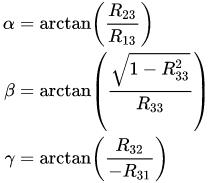

In [3]:
def rot2eul(R):
    
    phi = np.arctan2(R[1,2],R[0,2])
    theta = np.arctan2(np.sqrt(1-R[2,2]**2),R[2,2])
    psi = np.arctan2(R[2,1],-R[2,0])
    
    return np.degrees(phi), np.degrees(theta), np.degrees(psi)

rot2eul(R)

(0.0, 90.0, 0.0)

<IPython.core.display.Javascript object>


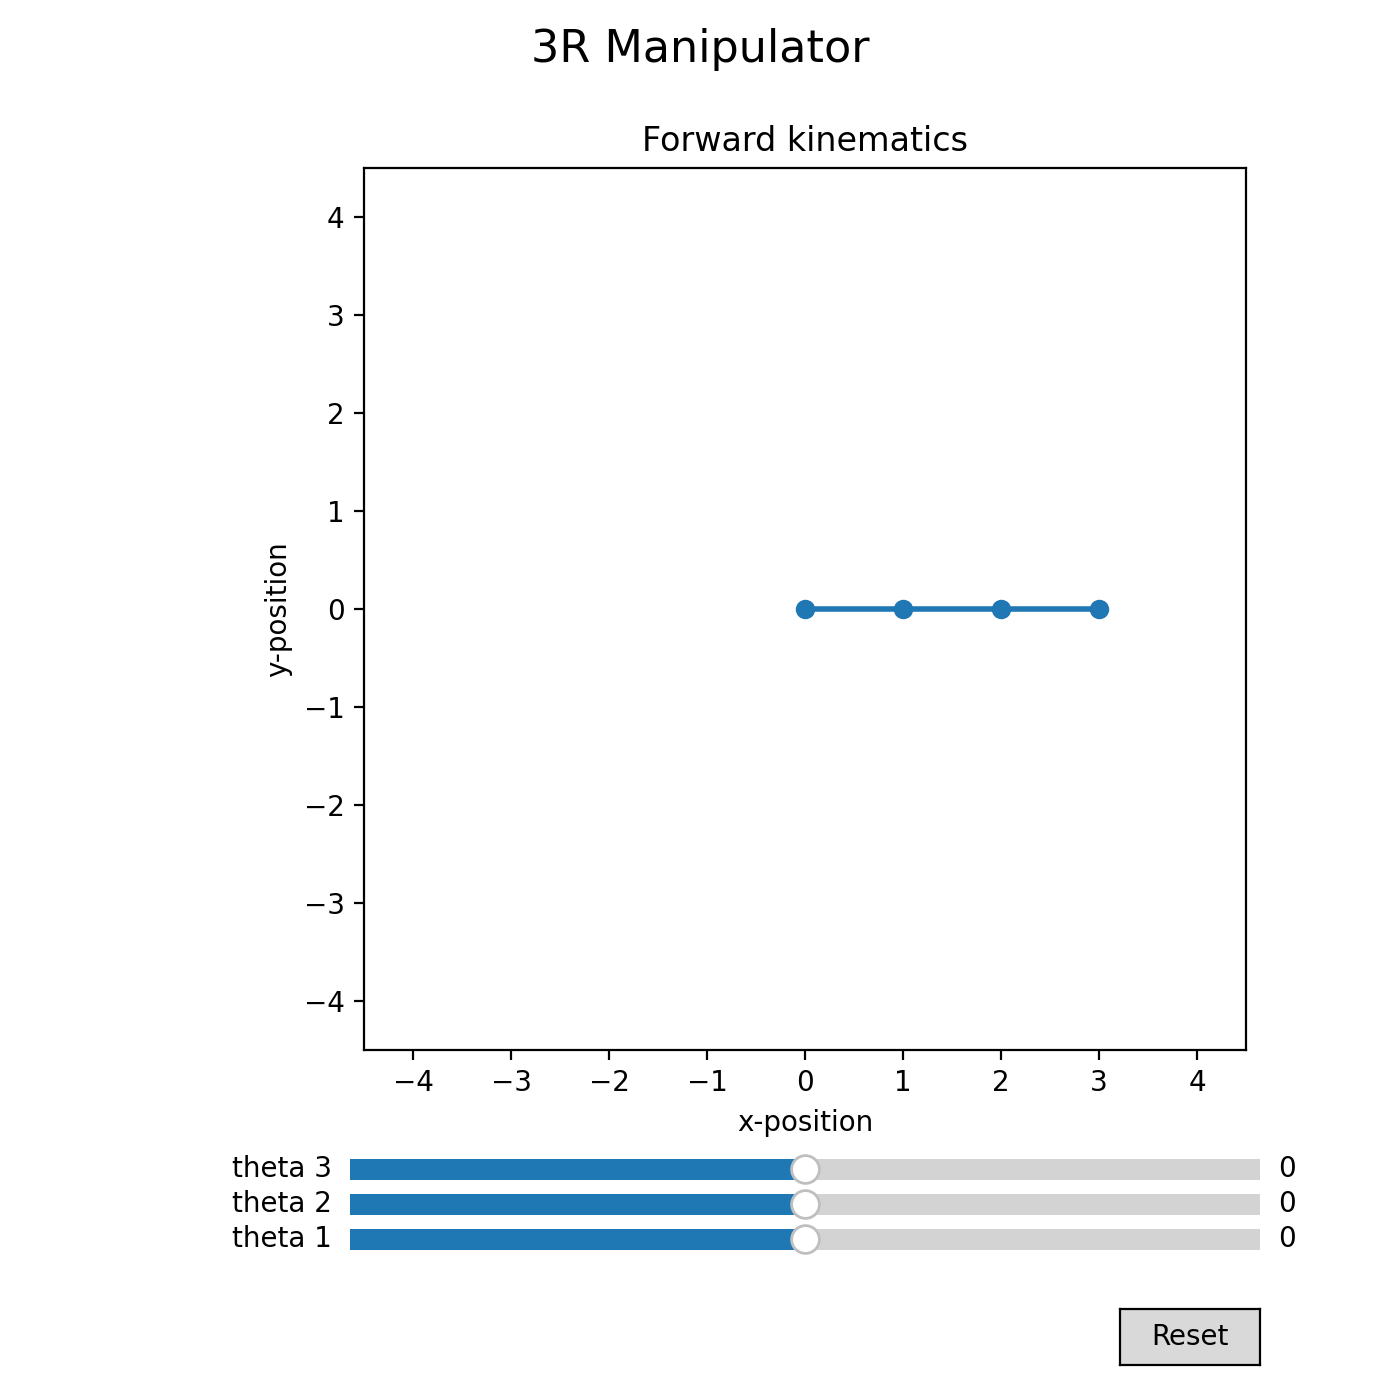

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib notebook

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
init_th1 = 0.0
init_th2 = 0.0
init_th3 = 0.0

c = np.cos
s = np.sin

l1 = 1
l2 = 1 
l3 = 1


class Manipulator:
    def __init__(self, l1, l2, l3):
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        
    def forward3R(self, th1, th2, th3):
        th1 = np.radians(th1)
        th2 = np.radians(th2)
        th3 = np.radians(th3)
        P1 = np.array([self.l1*c(th1), self.l1*s(th1)])
        P2 = np.array([self.l1*c(th1)+self.l2*c(th1+th2),self.l1*s(th1)+self.l2*s(th1+th2)])
        P3 = np.array([self.l1*c(th1)+self.l2*c(th1+th2)+self.l3*c(th1+th2+th3),self.l1*s(th1)+self.l2*s(th1+th2)+self.l3*s(th1+th2+th3)])
        return P1, P2, P3
        


L = l1+l2+l3
man = Manipulator(l1,l2,l3)    
fig = plt.figure(figsize=(7, 7))
fig.suptitle('3R Manipulator', fontsize=16)
ax = fig.add_subplot(autoscale_on=False, xlim=(-1.5*L, 1.5*L), ylim=(-1.5*L, 1.5*L))
plt.title("Forward kinematics")
P1,P2,P3 = man.forward3R(init_th1,init_th2,init_th3)
line, = ax.plot([0,P1[0],P2[0],P3[0]], [0,P1[1],P2[1],P3[1]], 'o-', lw=2)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_aspect('equal')
fig.subplots_adjust(left=0.25, bottom=0.25)




axth1 = fig.add_axes([0.25, 0.1, 0.65, 0.03])
th1_slider = Slider(
    ax=axth1,
    label='theta 1',
    valmin=-360,
    valmax=360,
    valinit= init_th1,
)

axth2 = fig.add_axes([0.25, 0.125, 0.65, 0.03])
th2_slider = Slider(
    ax=axth2,
    label='theta 2',
    valmin=-360,
    valmax=360,
    valinit= init_th2,
)

axth3 = fig.add_axes([0.25, 0.15, 0.65, 0.03])
th3_slider = Slider(
    ax=axth3,
    label='theta 3',
    valmin=-360,
    valmax=360,
    valinit= init_th3,
)

# The function to be called anytime a slider's value changes
def update(val):
    P1,P2,P3 = man.forward3R(th1_slider.val, th2_slider.val, th3_slider.val)
    line.set_xdata([0,P1[0],P2[0],P3[0]])
    line.set_ydata([0,P1[1],P2[1],P3[1]])
    print(P1)
    fig.canvas.draw_idle()
    
th1_slider.on_changed(update)
th2_slider.on_changed(update)
th3_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    th1_slider.reset()
    th2_slider.reset()
    th3_slider.reset()
button.on_clicked(reset)
    
    
plt.show()



In [5]:
def rot2axang(R):
    tr = np.trace(R)
    th = np.arccos((tr-1)/2)
    n = (1/2*s(th))* np.array([[R[2,1]-R[1,2]],[R[0,2]-R[2,0]],[R[1,0]-R[0,1]]])
    return n,np.degrees(th)
n,th = rot2axang(R)
print(n)
print(th)

[[0.]
 [1.]
 [0.]]
90.0


In [6]:
def axang2rot(n,th):
    I = np.eye(3)
    th = np.radians(th)
    n_c = np.array([[0 , -n[2,0], n[1,0]],[n[2,0], 0, -n[0,0]], [-n[1,0], n[0,0], 0]])
    R = I + s(th)*n_c + (1-c(th))*(n_c@n_c)
    return R
axang2rot(n,th)

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [-1.,  0.,  0.]])

Question 4.1

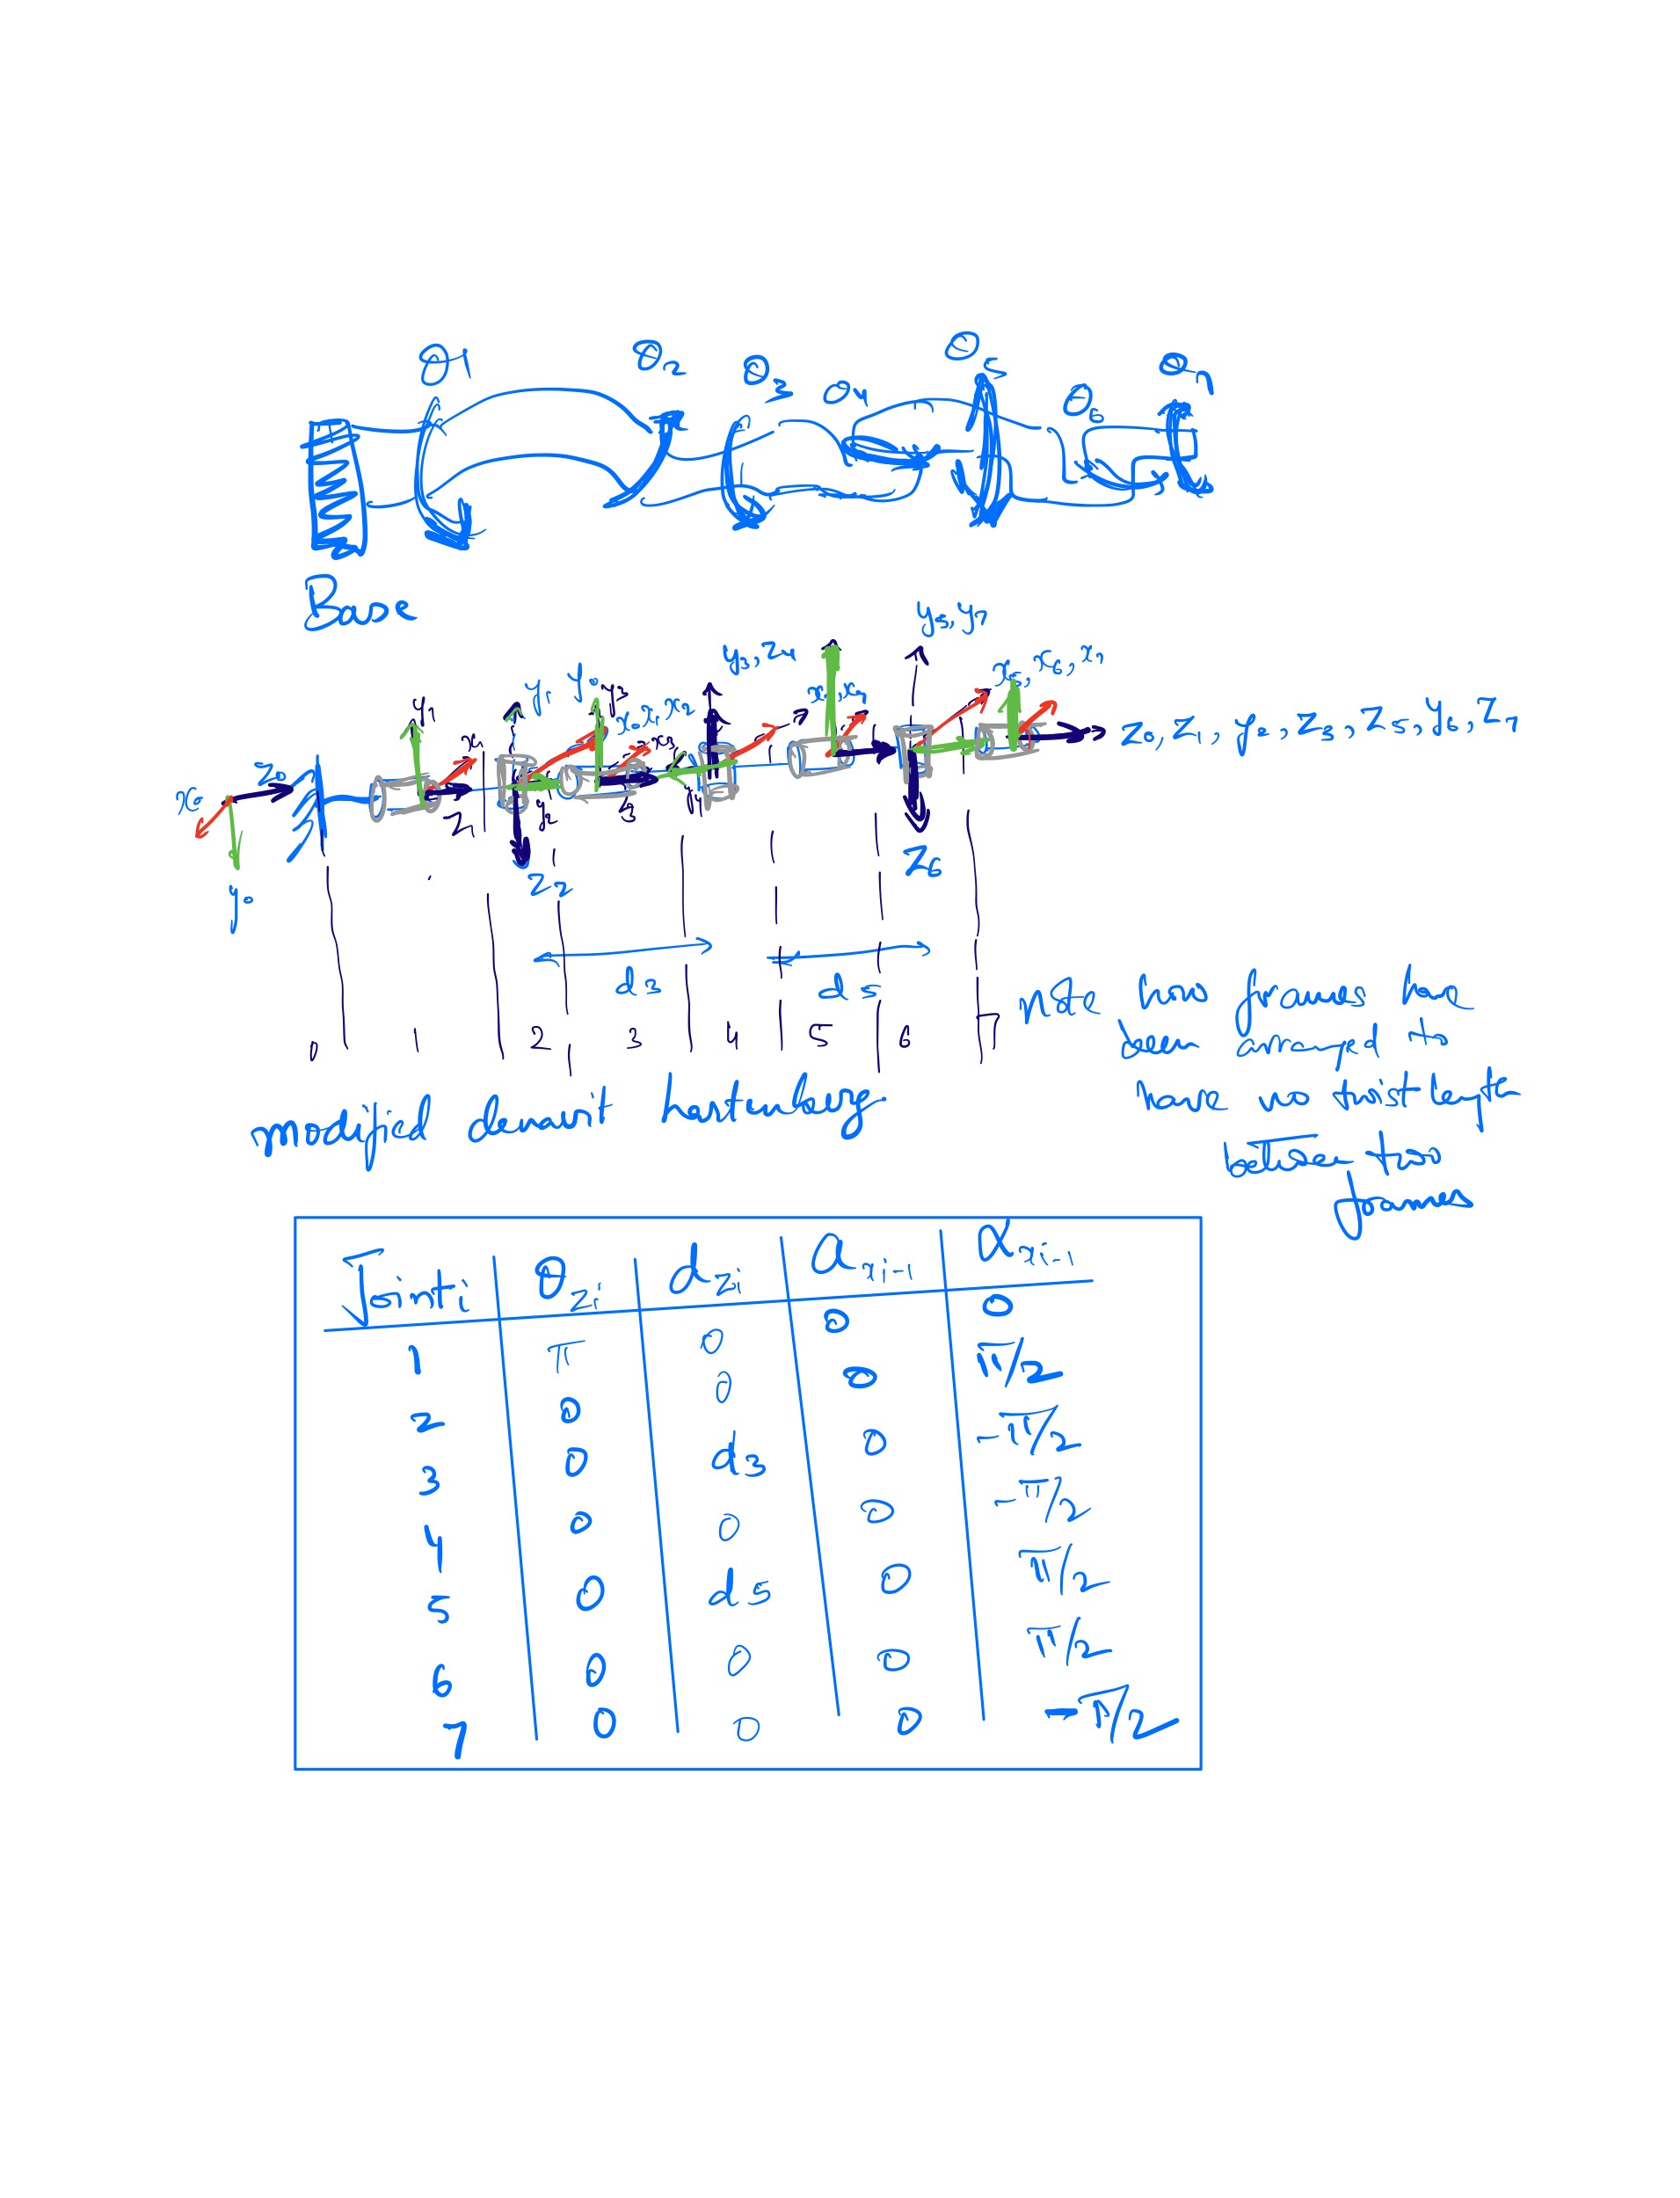

Question 4.2

In [2]:
import numpy as np
np.set_printoptions(suppress = True)

s = np.sin
c = np.cos
def t_im1(th,d,a,al):
    t_im1 = np.array([[c(th), -s(th), 0, a],[c(al)*s(th), c(al)*c(th),-s(al), -s(al)*d],[s(al)*s(th),c(th)*s(al),c(al),c(al)*d],[0,0,0,1]])
    return t_im1
def t_dh(dh):
    t = np.eye(4)
    for i in range(dh.shape[0]):
        t = t@t_im1(dh[i,0],dh[i,1],dh[i,2],dh[i,3])
    return t

d3 = 1
d5 = 1
dh = np.array([[-np.pi,0,0,0],[0,0,0,np.pi/2],[0,d3,0,-np.pi/2],[0,0,0,-np.pi/2],[0,d5,0,np.pi/2],[0,0,0,np.pi/2],[0,0,0,-np.pi/2]])

t = t_dh(dh)
print(t)

[[-1.  0. -0.  0.]
 [-0. -1.  0.  0.]
 [ 0.  0.  1.  2.]
 [ 0.  0.  0.  1.]]


Question 4.3

In [13]:
eframe = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,2],[0,0,0,1]])
print(np.linalg.inv(t)@eframe)

[[-1. -0. -0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


note how this is the orientation of the base link frame with the cartesian frame of the world frame

Question 5.1

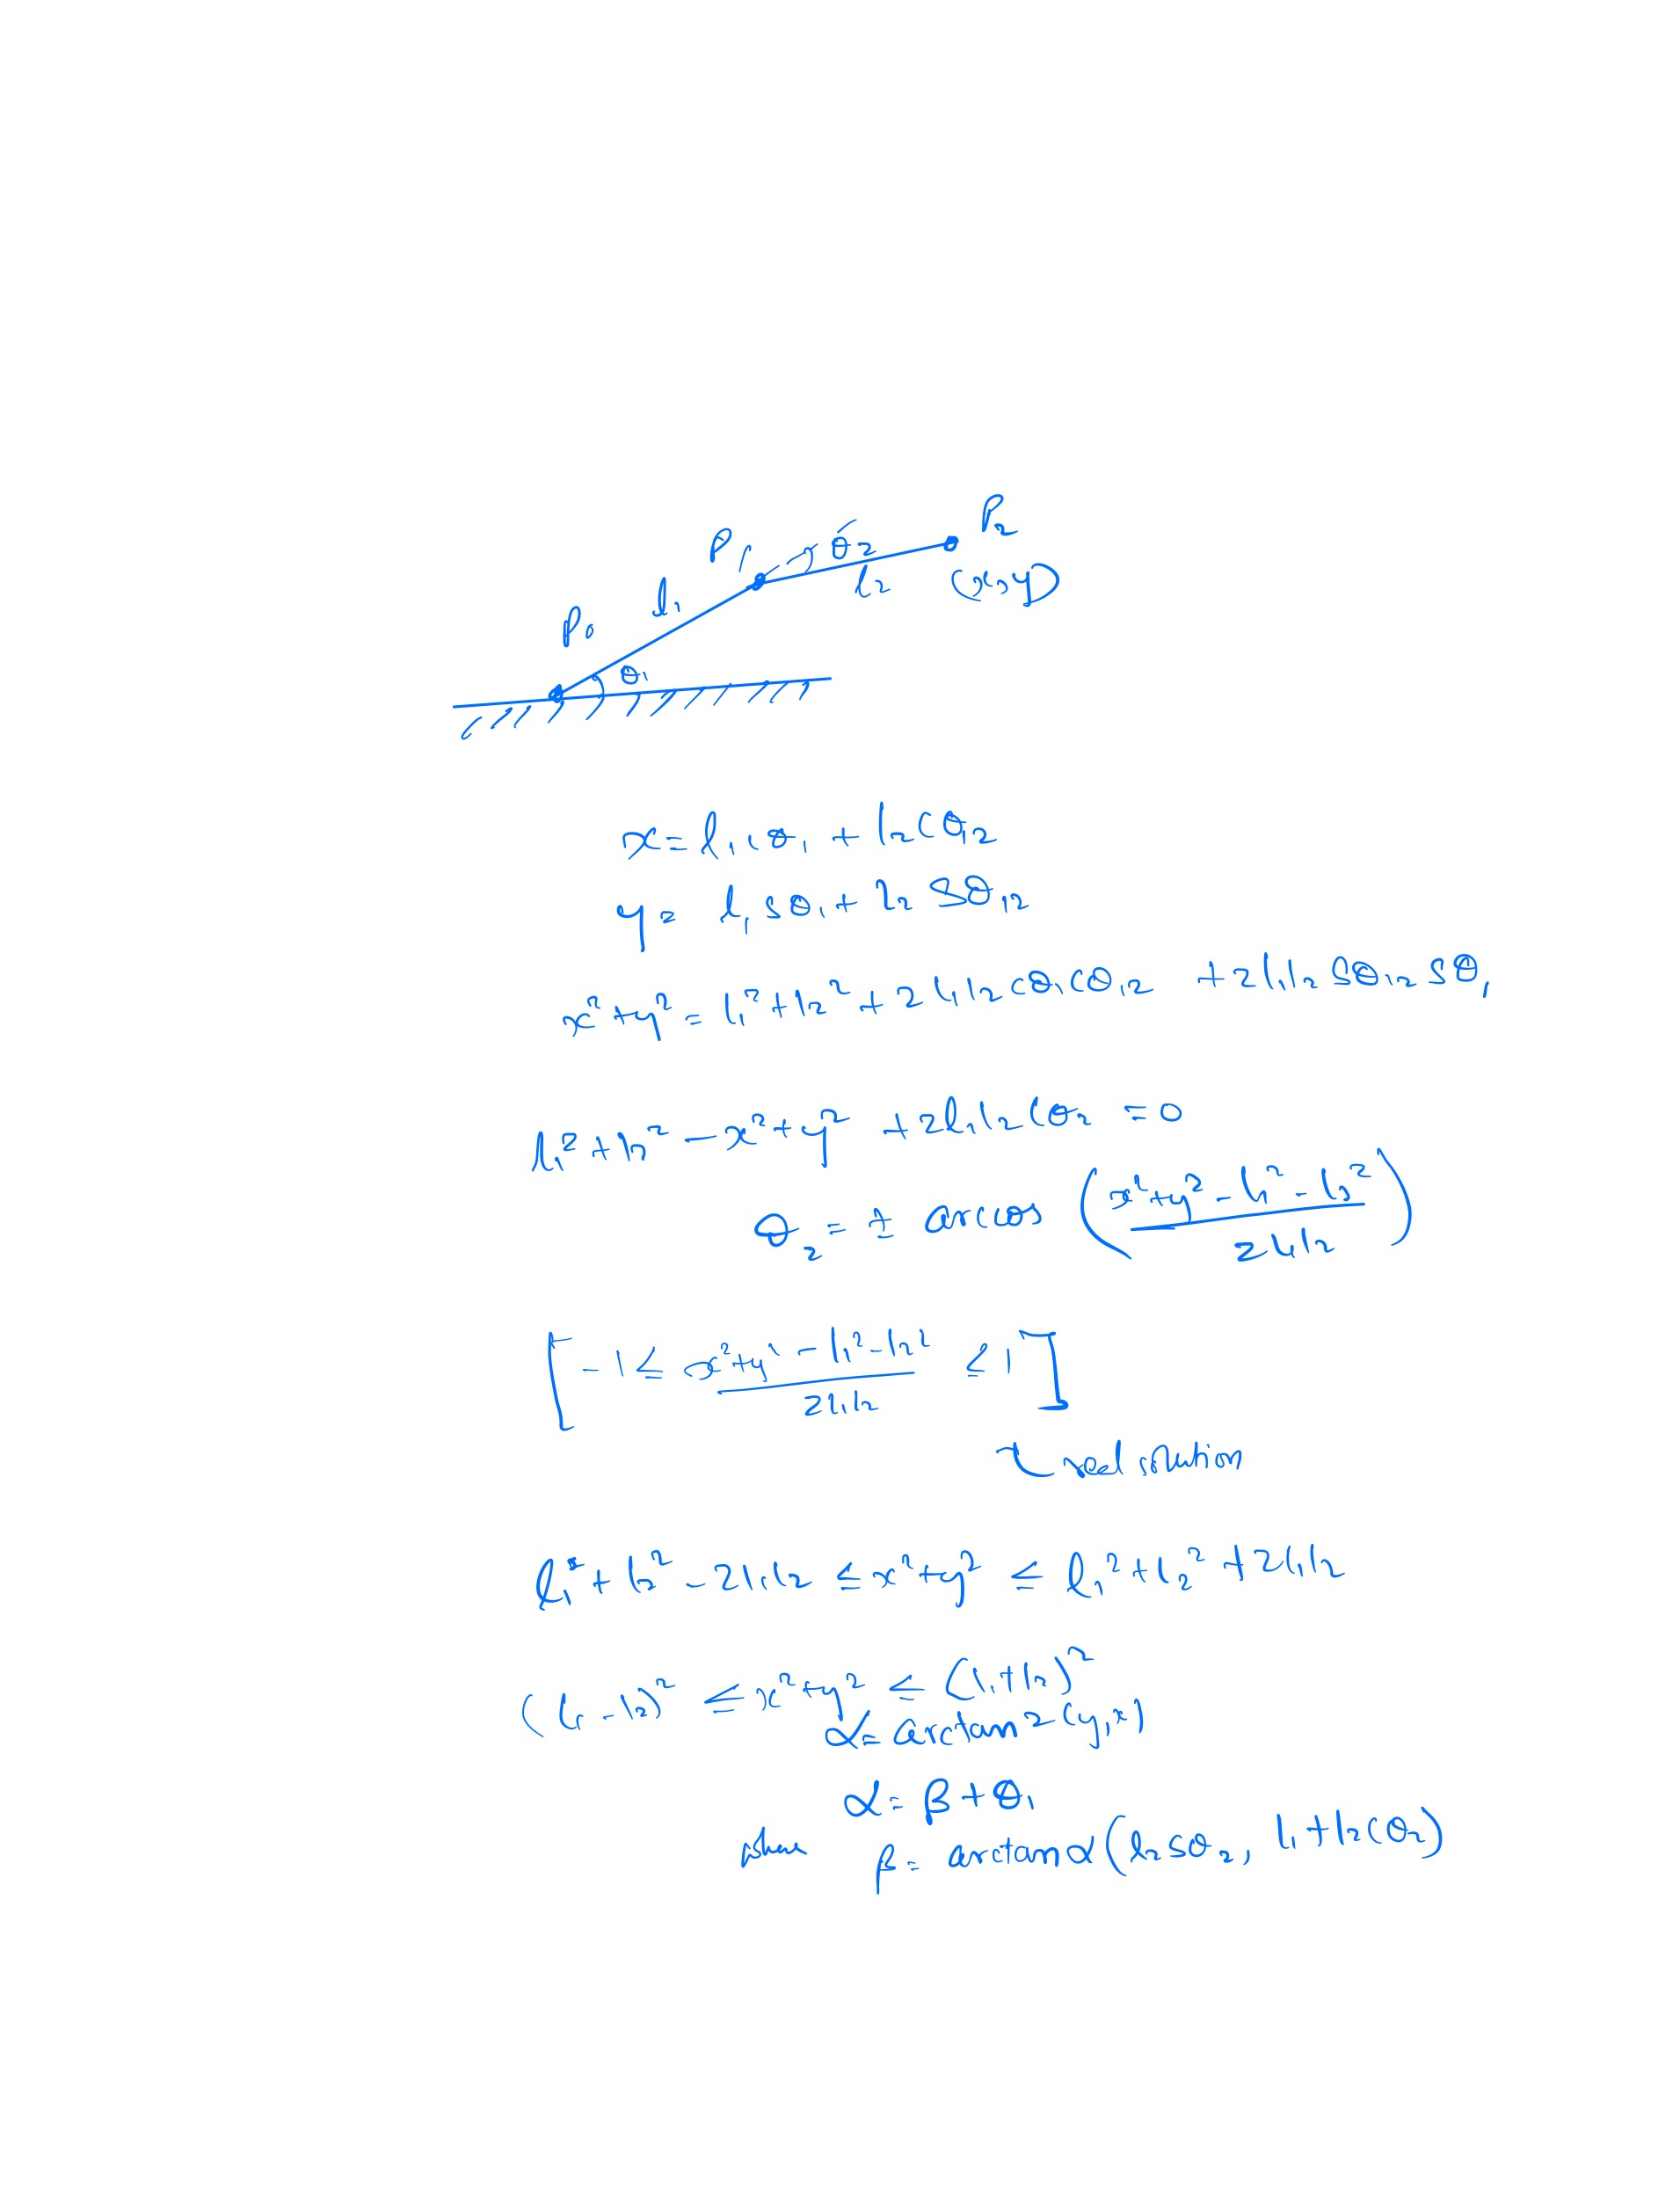

<IPython.core.display.Javascript object>


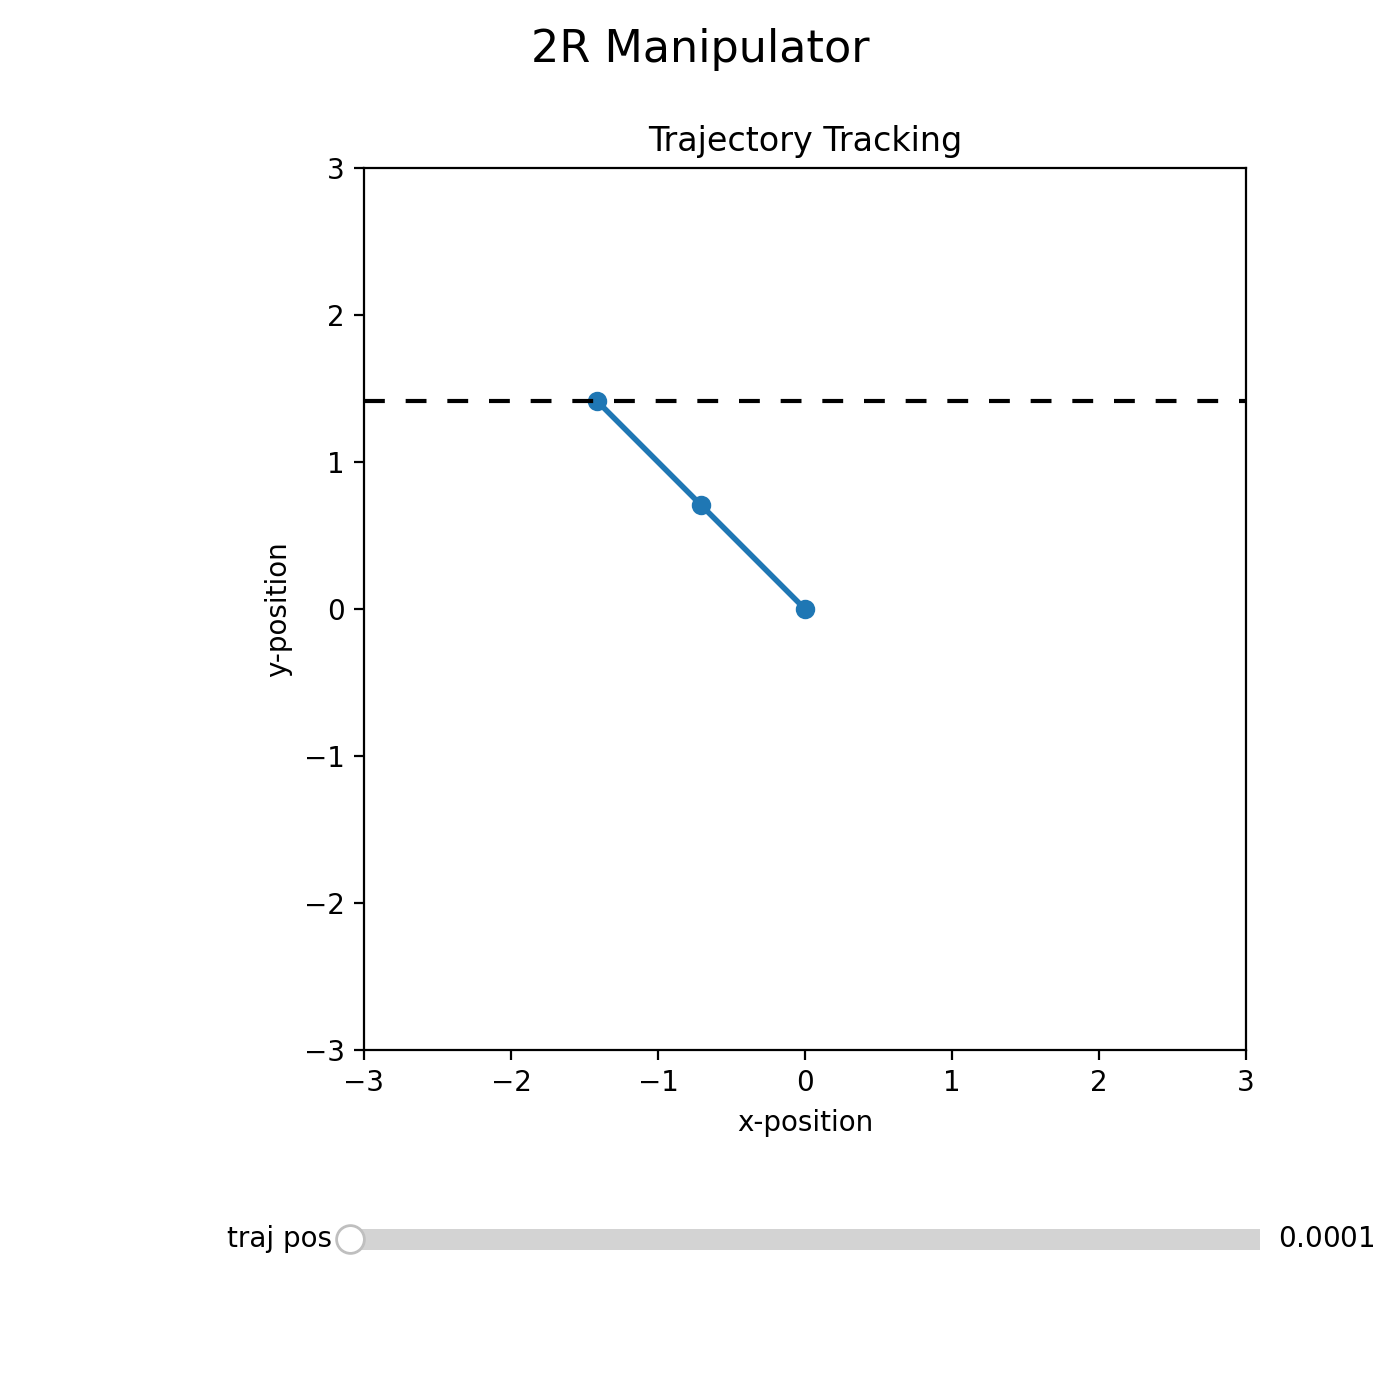

NameError: name 'xy' is not defined

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib notebook

c = np.cos
s = np.sin

init_th1 = 135
init_th2 = 0

class Manipulator2R:
    def __init__(self, l1, l2):
        self.l1 = l1
        self.l2 = l2
        
    def forward2R(self, th1, th2):
        th1 = np.radians(th1)
        th2 = np.radians(th2)
        P1 = np.array([self.l1*c(th1), self.l1*s(th1)])
        P2 = np.array([self.l1*c(th1)+self.l2*c(th1+th2),self.l1*s(th1)+self.l2*s(th1+th2)])
        return P1, P2
    
    def inverse2R(self, x, y):
        th2 = np.arccos((x**2 + y**2 - self.l1**2 - self.l2**2) / 2*self.l1*self.l2)
        alpha = np.arctan2(y,x)
        beta = np.arctan2(self.l2*s(th2), self.l1 +self.l2*c(th2))
        th1 = alpha-beta
        return np.degrees(th1),np.degrees(th2)

    
l1 = 1
l2 = 1
L = l1+l2
man = Manipulator2R(l1,l2)    
fig = plt.figure(figsize=(7, 7))
fig.suptitle('2R Manipulator', fontsize=16)
ax = fig.add_subplot(autoscale_on=False, xlim=(-1.5*L, 1.5*L), ylim=(-1.5*L, 1.5*L))
plt.title("Trajectory Tracking")
P1,P2 = man.forward2R(init_th1,init_th2)
line, = ax.plot([0,P1[0],P2[0]], [0,P1[1],P2[1]], 'o-', lw=2)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_aspect('equal')
fig.subplots_adjust(left=0.25, bottom=0.25)



axpos = fig.add_axes([0.25, 0.1, 0.65, 0.03])
pos_slider = Slider(
    ax=axpos,
    label='traj pos',
    valmin=0.0001,
    valmax=0.9999,
    valinit= 0,
)

p1 = np.array([-np.sqrt(2),np.sqrt(2)])
p2 = np.array([np.sqrt(2),np.sqrt(2)])
def retpol(vn, p1, p2):
    return ((1-vn)*p1[0] + (vn)*p2[0]) , ((1-vn)*p1[1]+(vn)*p2[1])

#plot FWS and trajectory

ax.axline((0, np.sqrt(2)), slope=0, color="black", linestyle=(0, (5, 5)))
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
 
radius = L
 
cx = radius * np.cos( angle ) 
cy = radius * np.sin( angle ) 

ax.plot(cx,cy)


# The function to be called anytime a slider's value changes
def update(val):
    #slider gives x,y
    vn = pos_slider.val
    x,y = retpol(vn, p1,p2)
    print(x,y)
    #x,y gives th1, th2
    th1, th2 = man.inverse2R(x,y)
    P1,P2 = man.forward2R(th1, th2)
    line.set_xdata([0,P1[0],P2[0]])
    line.set_ydata([0,P1[1],P2[1]])
    fig.canvas.draw_idle()
    
pos_slider.on_changed(update)


# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    pos_slider.reset()
    P1,P2 = man.forward2R(init_th1,init_th2)
    line.set_xdata([0,P1[0],P2[0]])
    line.set_ydata([0,P1[1],P2[1]])
button.on_clicked(reset)
    
    
#plt.show()




Question 6.1:

Quadcopters are underactuated system as they have four control inputs but six DoFs.



Question 6.2:

A hexacopter is underactuated as it has six DoFs and four control inputs (one thrust and three torques)

Question 6.3:

Coaxial octacopter is underactuated system as they have four control inputs but six DoFs.

Question 6.4:

fixed wing UAV is underactuated system as they have one control inputs but six DoFs.

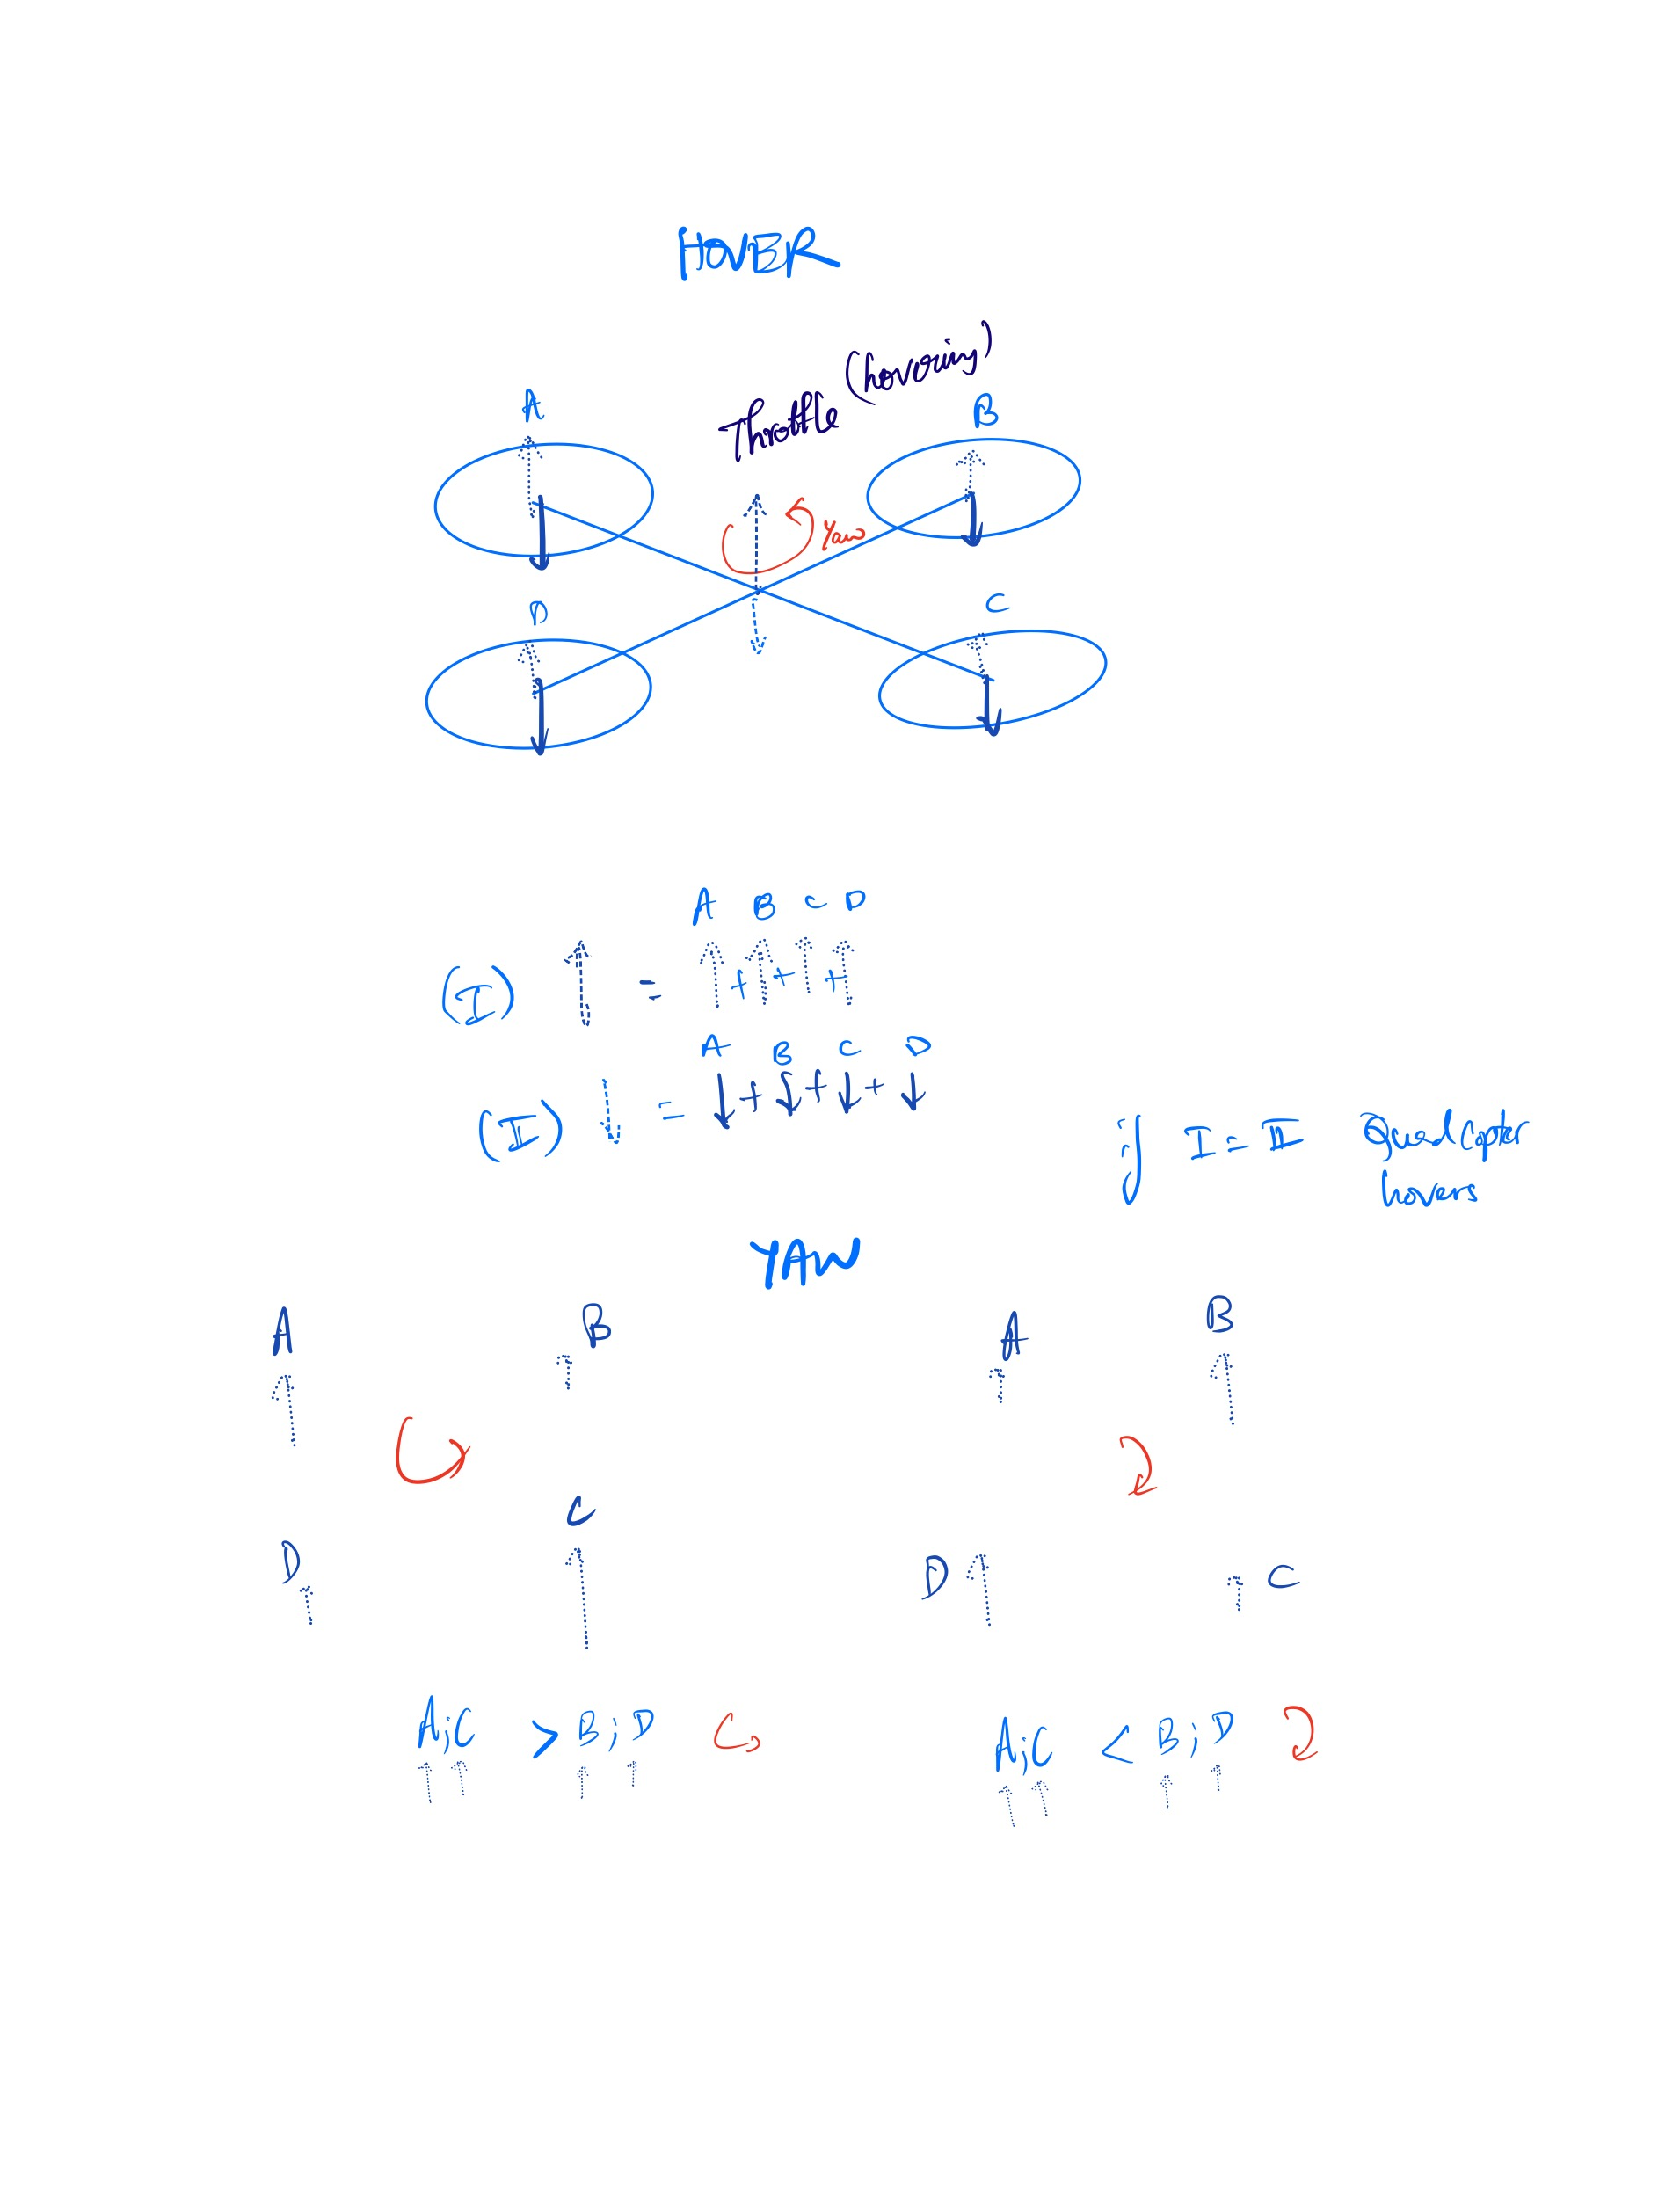